In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('cervical-cancer-new.csv');

#資料欄位與型態
data.info()
data.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835 entries, 0 to 834
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 835 non-null    int64  
 1   Number of sexual partners           835 non-null    int64  
 2   First sexual intercourse            835 non-null    int64  
 3   Num of pregnancies                  835 non-null    int64  
 4   Smokes                              835 non-null    int64  
 5   Smokes (years)                      835 non-null    float64
 6   Smokes (packs/year)                 835 non-null    float64
 7   Hormonal Contraceptives             835 non-null    int64  
 8   Hormonal Contraceptives (years)     835 non-null    float64
 9   IUD                                 835 non-null    int64  
 10  IUD (years)                         835 non-null    float64
 11  STDs                                835 non-n

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4,15,1,0,0.0,0.0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
1,15,1,14,1,0,0.0,0.0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2,34,1,0,1,0,0.0,0.0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
biopsy_all=list(data.shape)[0]
biopsy_categories=list(data['Biopsy'].value_counts())
print("資料筆數{},沒有診斷出{}筆,有診斷出{}筆".format(biopsy_all,biopsy_categories[0],biopsy_categories[1]))

資料筆數835,沒有診斷出781筆,有診斷出54筆


In [7]:
#取特徵欄位
features_mean= list(data.columns[1:11])

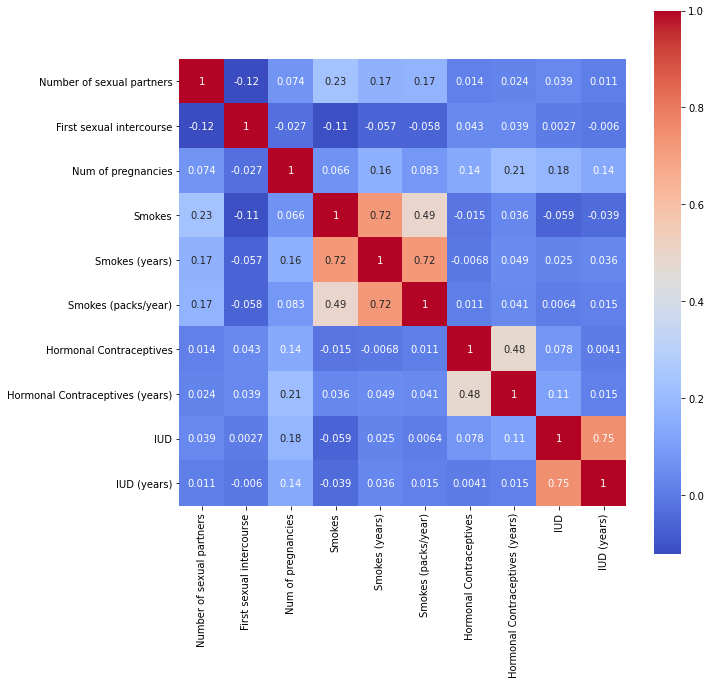

In [8]:
#計算correlation(相關性)
plt.figure(figsize=(10,10))
sns.heatmap(data[features_mean].corr(), annot=True, square=True, cmap='coolwarm')
plt.show()

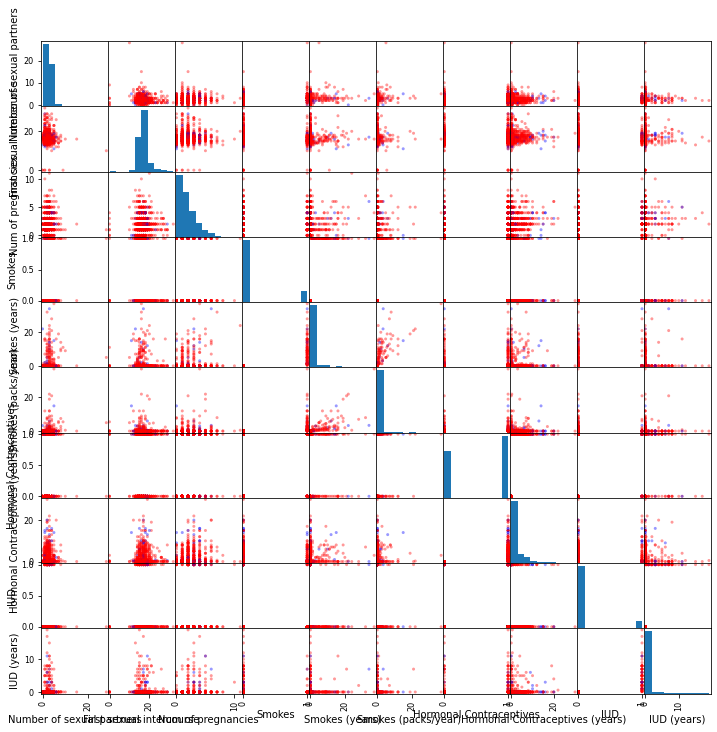

In [12]:
color_dic = {0:'red', 1:'blue'}
colors = data['Biopsy'].map(lambda x: color_dic.get(x))

## 用於比較有與沒有診斷出這些特徵欄位的資料分佈
sm = pd.plotting.scatter_matrix(data[features_mean], c=colors, alpha=0.4, figsize=((12,12)));

plt.show()

C:\Users\88695\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\88695\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\88695\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\88695\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\88695\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\88695\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Defa

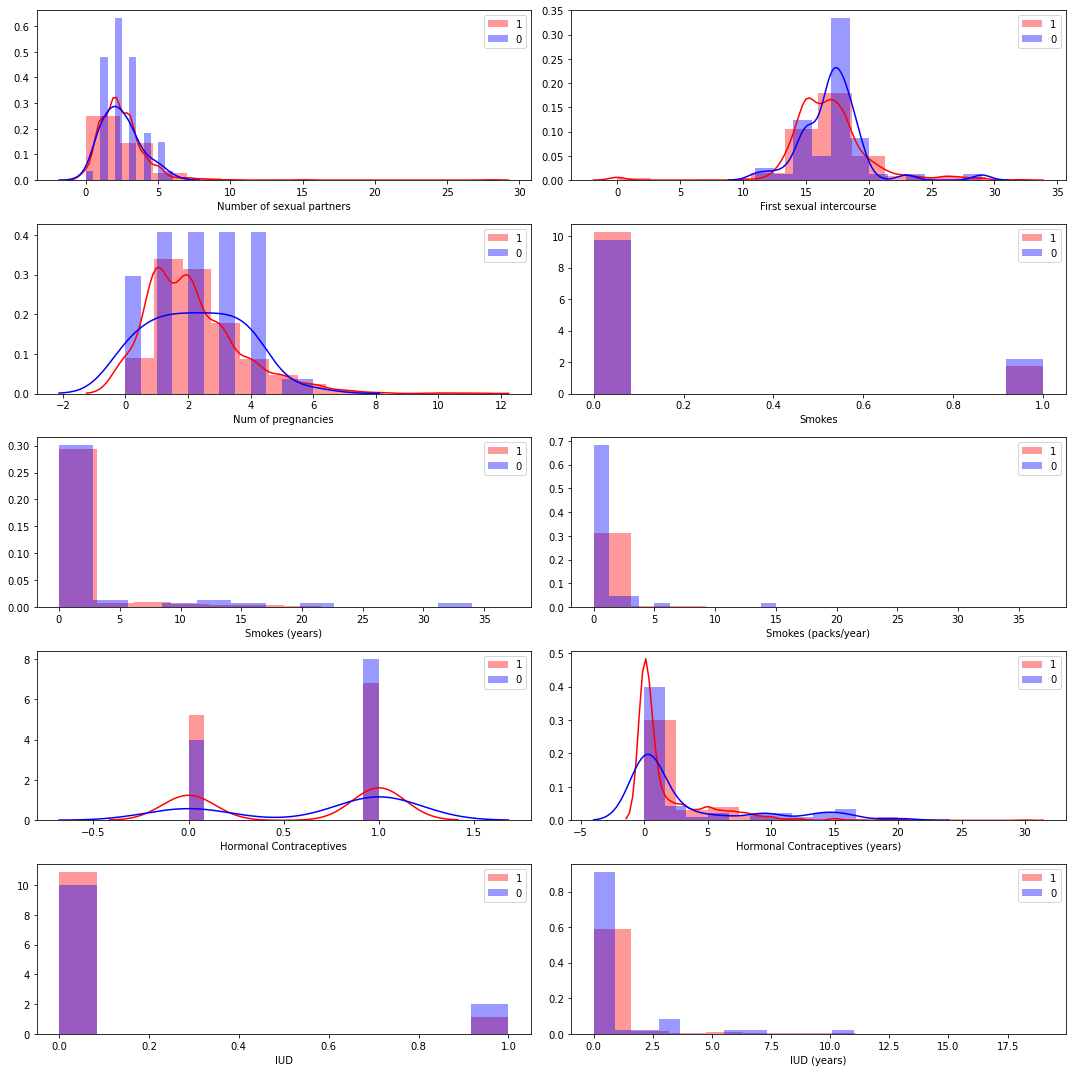

In [10]:
## 用於比較有與沒有診斷出這些特徵欄位的資料分佈

bins = 12
plt.figure(figsize=(15,15))
for i, feature in enumerate(features_mean):
    rows = int(len(features_mean)/2)
    
    plt.subplot(rows, 2, i+1)
    
    sns.distplot(data[data['Biopsy']==0][feature], bins=bins, color='red', label='1');
    sns.distplot(data[data['Biopsy']==1][feature], bins=bins, color='blue', label='0');
    
    plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

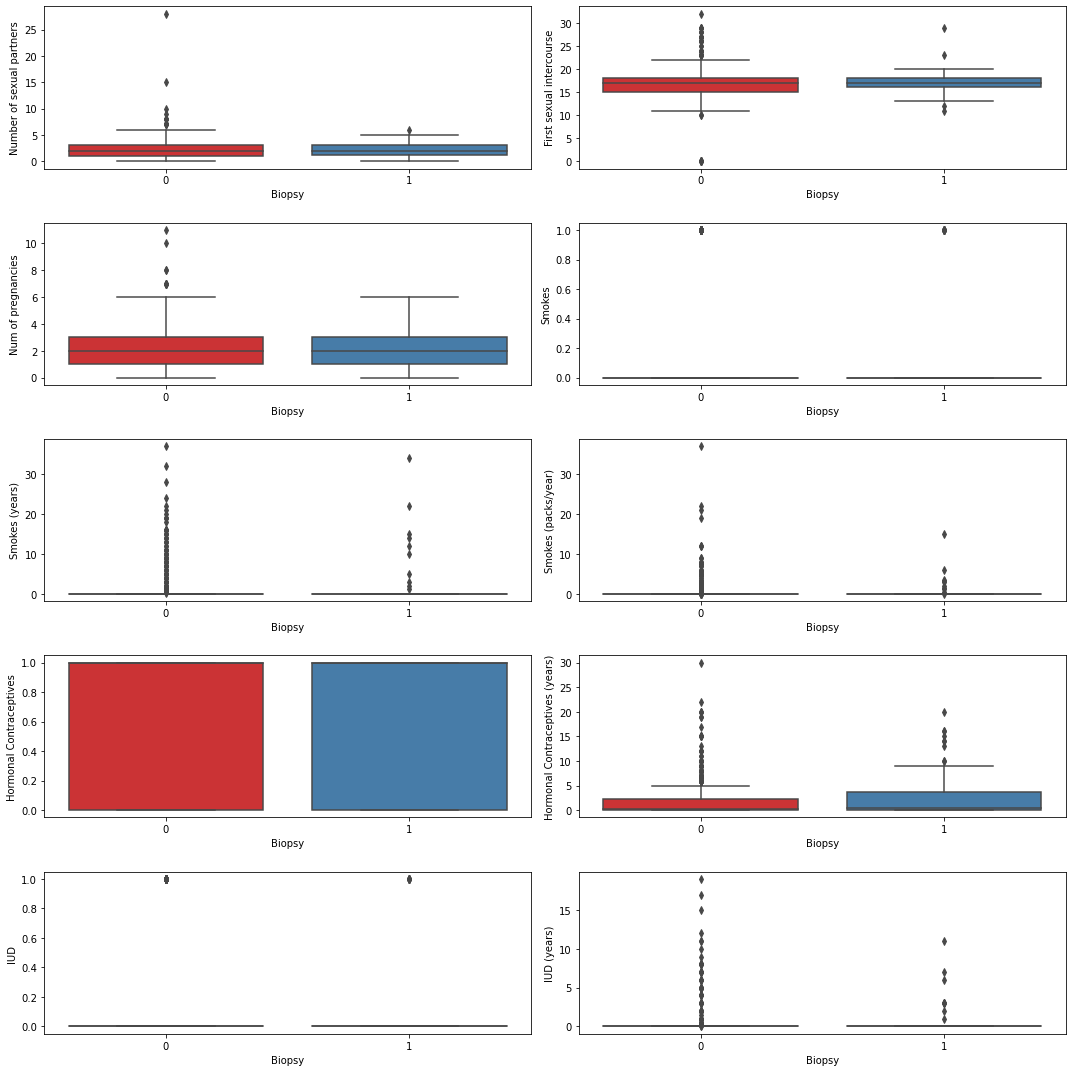

In [11]:
## 用於比較有與沒有診斷出這些特徵欄位的資料分佈

plt.figure(figsize=(15,15))
for i, feature in enumerate(features_mean):
    rows = int(len(features_mean)/2)
    
    plt.subplot(rows, 2, i+1)
    
    sns.boxplot(x='Biopsy', y=feature, data=data, palette="Set1")

plt.tight_layout()
plt.show()